# Development of machine learning models to process Electronic Health Records – Explainable Models

### Preprocessing Notebook
Lok Hang Toby Lee (2431180L)

# Importing data
--------------------------------------------

In [2]:
# Imports:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, train_test_split
from matplotlib import pyplot as plt
import seaborn as sn
import sys
sys.path.append('../')
#from plot_metrics import PlotMetrics
import tensorflow as tf
import imp
import warnings
warnings.filterwarnings('ignore')

# SET YOUR PATH FOR RESOURCES FILE HERE
resources_path = "C:/Users/USER/OneDrive/GU/Year 4/FYP\MIMIC-III-ML/resources"
data_path = "C:/Users/USER/OneDrive/GU/Year 4/FYP\MIMIC-III-ML/data/raw"

In [12]:
# Extract the in-hospital mortality data:
X = pd.read_hdf(data_path + 'vitals_hourly_data_preprocessed.h5', 'X')
Y = pd.read_hdf(data_path + 'vitals_hourly_data_preprocessed.h5', 'Y')[['in_hospital_mortality', 'los']]

X = X.sort_index(axis = 0, level = 'icustay_id')
Y = Y.sort_index(axis = 0, level = 'icustay_id')

# Remove the icustays that were less than 48 hours:
indices_to_remove = []
for i, row in Y.iterrows():
    if row['los'] < 48:
        indices_to_remove.append(i)
        
X = X.reset_index().set_index('icustay_id').drop(indices_to_remove, axis = 0)
Y = Y.drop(indices_to_remove, axis = 0)

X['in_hospital_mortality']=Y['in_hospital_mortality']
y_data= X.pop('in_hospital_mortality')
x_data= X


In [13]:
x_data

,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,"('Glascow coma scale total', 'mean')_11.0","('Glascow coma scale total', 'mean')_12.0","('Glascow coma scale total', 'mean')_13.0","('Glascow coma scale total', 'mean')_14.0","('Glascow coma scale total', 'mean')_15.0","('Glascow coma scale verbal response', 'mean')_1.0","('Glascow coma scale verbal response', 'mean')_2.0","('Glascow coma scale verbal response', 'mean')_3.0","('Glascow coma scale verbal response', 'mean')_4.0","('Glascow coma scale verbal response', 'mean')_5.0"
icustay_id,,,,,,,,,,,,,,,,,,,,,
200003,27513,163557,0,0.159609,0.407795,0.049422,0.396667,0.70402,0.139241,0.970,...,0,0,0,0,1,0,0,0,0,1
200003,27513,163557,1,0.169381,0.407795,0.049422,0.393333,0.70402,0.142405,0.960,...,0,0,0,0,1,0,0,0,0,1
200003,27513,163557,2,0.170467,0.407795,0.049422,0.386667,0.70402,0.144515,0.950,...,0,0,0,0,1,0,0,0,0,1
200003,27513,163557,3,0.197068,0.407795,0.049422,0.373333,0.70402,0.162975,0.935,...,0,0,0,0,1,0,0,0,0,1
200003,27513,163557,4,0.198697,0.407795,0.049422,0.360000,0.70402,0.167722,0.915,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,28775,134959,44,0.267101,0.407795,0.033376,0.240000,0.70402,0.250000,0.990,...,0,0,0,0,1,0,0,0,0,1
299995,28775,134959,45,0.267101,0.407795,0.033376,0.273333,0.70402,0.250000,0.990,...,0,0,0,0,1,0,0,0,0,1
299995,28775,134959,46,0.211726,0.407795,0.033376,0.243333,0.70402,0.212025,0.990,...,0,0,0,0,1,0,0,0,0,1


# Machine Learning Base model

--------------------------------------

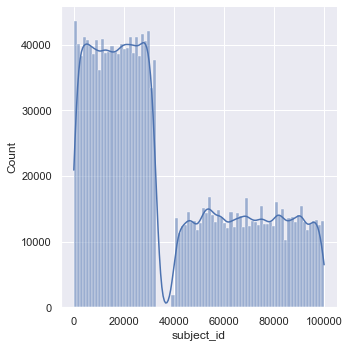

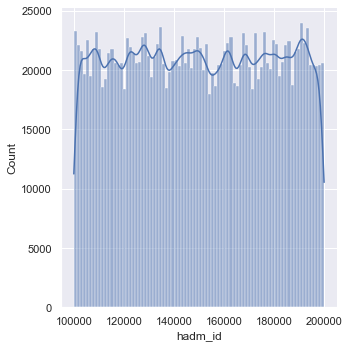

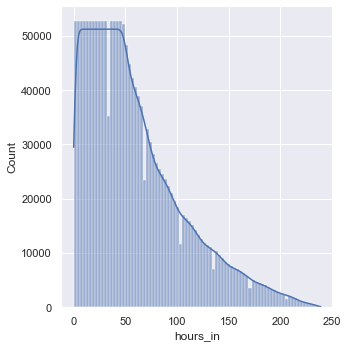

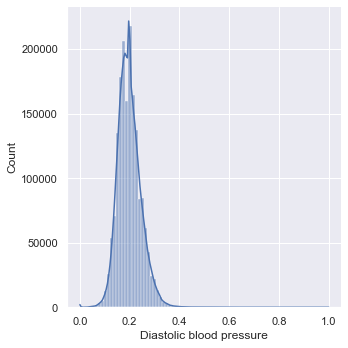

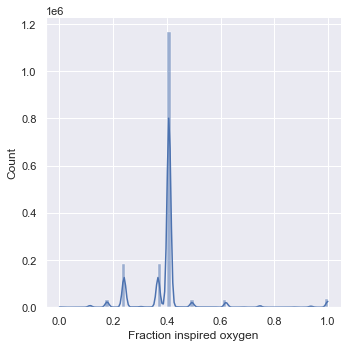

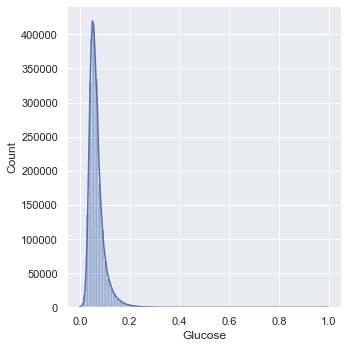

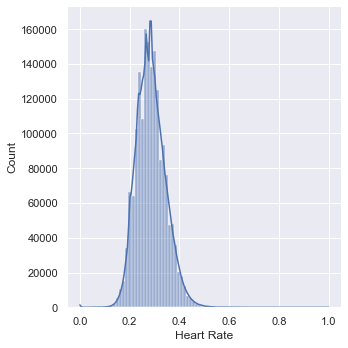

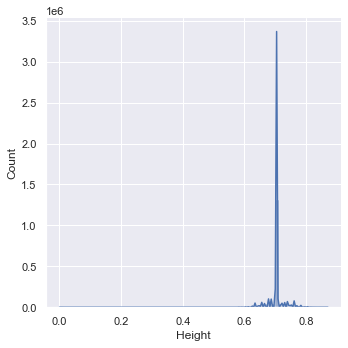

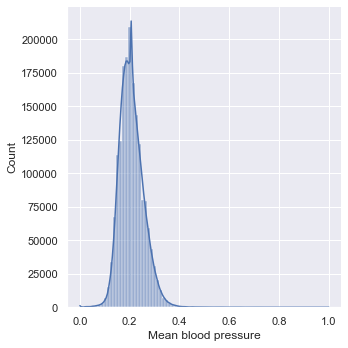

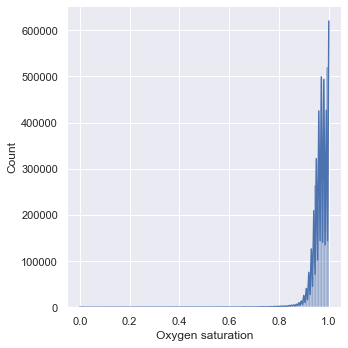

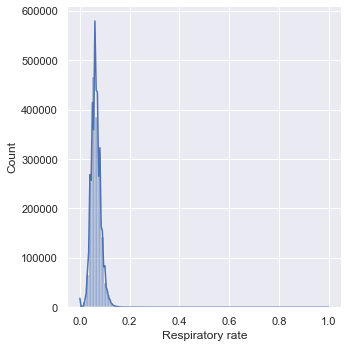

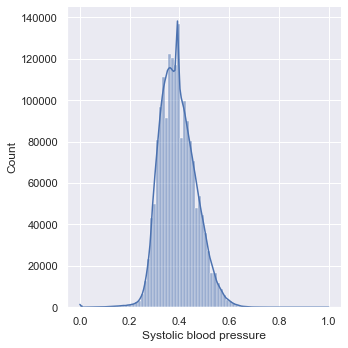

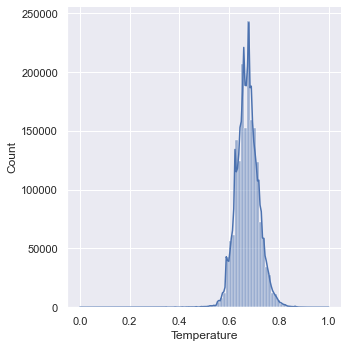

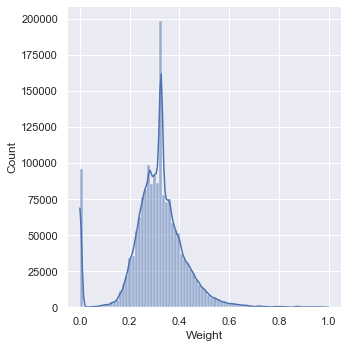

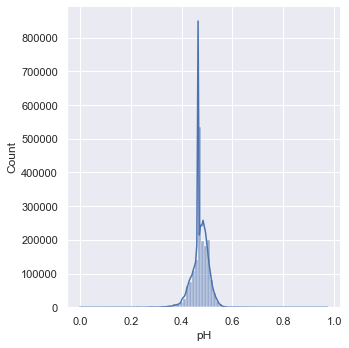

In [12]:
import seaborn as sns
"""
Plots histograms of all columns in train data
"""
x_features=['subject_id', 'hadm_id', 'hours_in', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height',
       'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
       'Systolic blood pressure', 'Temperature', 'Weight', 'pH']
       
for i in x_features:
    sns.set_theme()
    # Uncomment to see histograms of all columns
    sns.displot(x_data[i], bins=82, kde=True)

### Imports

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold, train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


### Function for plotting ROC

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc(classifier,model,x,y,n_splits):
    # Run classifier with cross-validation and plot ROC curves
    cv = KFold(n_splits)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(x, y)):
        classifier.fit(x[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic (ROC): "+model,
    )
    ax.legend(loc="lower right")
    plt.show()

### Function for plotting confusion matrix

In [22]:
from sklearn.metrics import *

def plot_confusion(y,y_pred,name):
    # Confusion Matrix

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix (' + name + ')')

### Utility function for printing score


In [7]:
def showResults(test, pred, model_name, title_name):

    print(title_name + ":")
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average = 'macro')
    f1score_macro = f1_score(test, pred, average='macro') 
    f1score_micro = f1_score(test, pred, average='micro') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score macro : {}".format(f1score_macro))
    print("f1score micro : {}".format(f1score_micro))
    cm=confusion_matrix(test, pred, labels=[1,2,3,4,5,6,7,8])
    
    # ROC AUC curve:
    roc_auc_logreg = roc_auc_score(test, pred)
    fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(test, pred)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(test))]
    lr_probs = model_name.predict_proba(test)
    lr_probs=lr_probs[:, 1]
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('ROC curve for in-hospital mortality (' + title_name + ')')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    #Confusion Matrix

    cm = metrics.confusion_matrix(test, pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for in-hospital mortality (' + title_name + ')')


### Utility function for showing confuson matrix and ROC curve

### Recursive feature Selection


In [21]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR

estimator = LinearSVR()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(x_data, y_data)
selector.support_

x_features=[]
for i in range(len(selector.support_)):
    if(selector.support_[i]==True):
        x_features.append(i)

#x_features=[8, 9, 10, 12, 14]

In [15]:
# x_features=['subject_id', 'hadm_id', 'hours_in', 'Diastolic blood pressure',
#        'Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height',
#        'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
#        'Systolic blood pressure', 'Temperature', 'Weight', 'pH']


x_features=['Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Temperature','pH']

### Manual feature selection

In [16]:
rfe_x=x_data[x_features]

In [17]:
rfe_x

,Mean blood pressure,Oxygen saturation,Respiratory rate,Temperature,pH
icustay_id,,,,,
200003,0.139241,0.970,0.116667,0.710426,0.495559
200003,0.142405,0.960,0.106667,0.801370,0.495559
200003,0.144515,0.950,0.101111,0.756851,0.495559
200003,0.162975,0.935,0.108333,0.726029,0.495559
200003,0.167722,0.915,0.123333,0.667808,0.495559
...,...,...,...,...,...
299995,0.250000,0.990,0.066667,0.650687,0.473684
299995,0.250000,0.990,0.066667,0.650687,0.473684
299995,0.212025,0.990,0.066667,0.650687,0.473684


### Logistic regression (Train test split)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(rfe_x, y_data, test_size=0.25, random_state=0)

lg = LogisticRegression(penalty = 'l2', C = 1, random_state = 0, solver='lbfgs', class_weight='balanced')
lg.fit(X_train, y_train)
lg_predction = lg.predict(X_test)
#showResults(y_test,lg_predction,lg,'Logistic Regression')
#plot_confusion(y_test,lg_predction,'Logistic Regression')
plot_roc(lg,'logistic regression',rfe_x,y_data,n_splits=5)


NameError: name 'plot_roc' is not defined

### Logistic regression 

In [40]:
x_data.shape

(1727405, 15)

In [39]:
y_data.shape

(1727405,)

In [41]:
from sklearn.model_selection import cross_val_score,cross_val_predict

lg = LogisticRegression(penalty = 'l2', C = 1, random_state = 0, solver='lbfgs', class_weight='balanced')
scores = cross_val_score(lg, x_data, y_data, scoring='f1', cv=5)
#y_pred= cross_val_predict(lg, x_data, x_data, cv=5)


# Plots the ROC and confusion matrix
# plot_roc(clf,'Logistic Regression',x_data,y_data,n_splits=5)
# plot_confusion(y,y_pred,'Logistic Regression')

print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),'Logistic Regression'))

Accuracy: 0.25 (+/- 0.00) [Logistic Regression]


### Random Forest Classifier


Random Forest:
Accuracy  : 0.9566054283737745
Precision : 0.9719415978676319
Recall : 0.8493566753808709
f1score macro : 0.8978243435525299
f1score micro : 0.9566054283737745


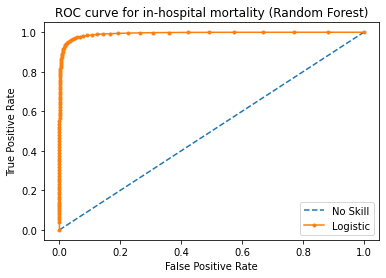

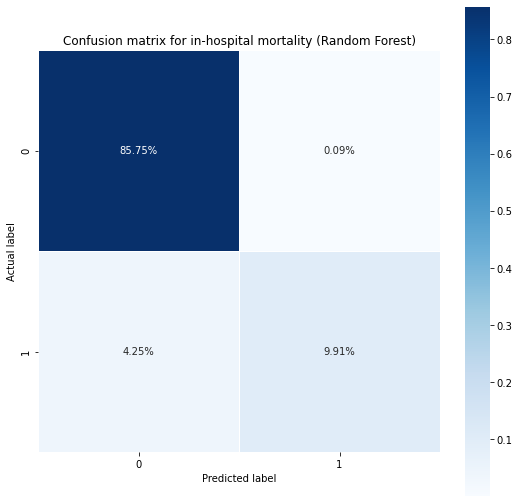

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predction = rf.predict(x_test)
showResults(y_test,rf_predction,rf,'Random Forest')
 

### Grid search CV for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
   'n_estimators': [0,5,10,15,20], 
   'max_depth':[1,2,3],
   'min_samples_split':[2,3,4,5,6],
   'min_samples_leaf':[0,1,2,3,4],
   'random_state': [0,1,2,3,4]
}

forest = RandomForestClassifier()
clf = GridSearchCV(forest, params, cv=5)
clf.fit(X, y)
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={
   'n_estimators': [0,5,10,15,20], 
   'max_depth':[1,2,3],
   'min_samples_split':[2,3,4,5,6],
   'min_samples_leaf':[0,1,2,3,4],
   'random_state': [0,1,2,3,4]
})
             
sorted(clf.cv_results_.keys())

### SVC Classfier

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
svc_predction = svc.predict(x_test)
showResults(y_test,svc_predction,svc,'SVC')